#### Importing libs

In [352]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [353]:
bikedata = pd.read_csv('day.csv')
bikedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Fetch dataset information

<br>

In [354]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [355]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [356]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Check relation among different continous parameters of dataset

**Continous parameters are**:

* temp

* atemp

 * hum

* windspeed

* casual

* registered
        
* cnt

Let's do a pairplot of these variables

<Figure size 1440x1080 with 0 Axes>

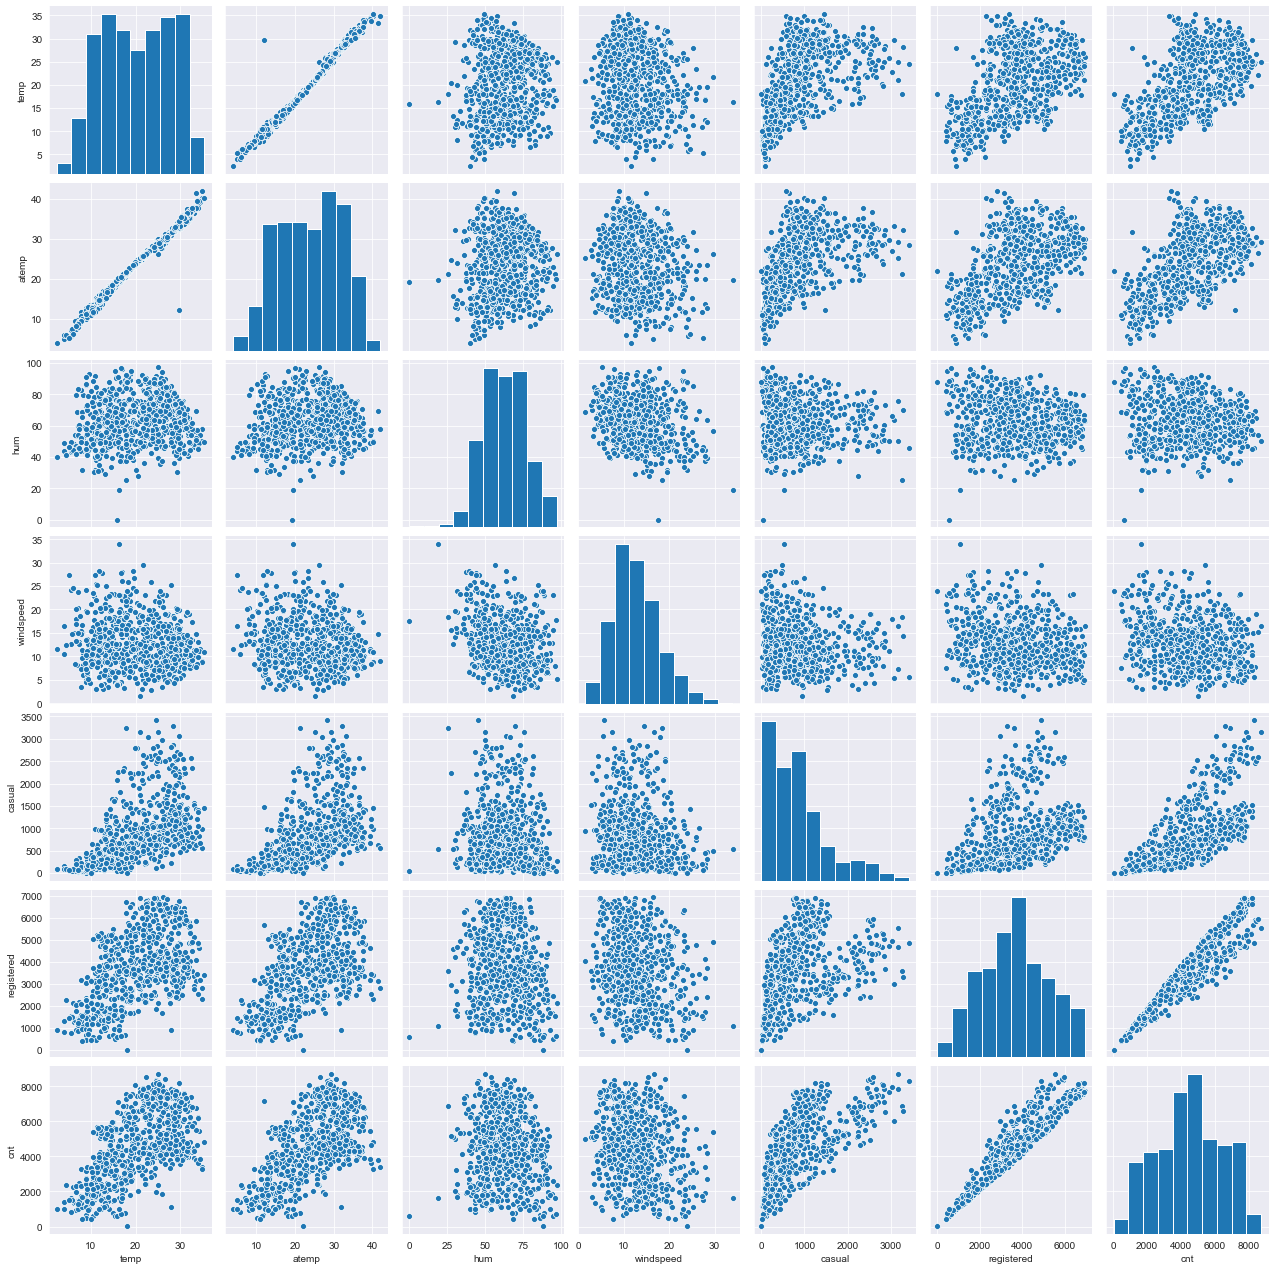

In [357]:
plt.figure(figsize=[20,15])
sns.pairplot(bikedata[['temp', 'atemp', 'hum', 'windspeed', 'casual',
                      'registered', 'cnt']])
plt.show()

**Analysis**
* There are relations among different parameters.
* Scaling will be reqired as we can see the ranges of the numerical variables ar varying a lot
* Some of the parameters whose relations are quite visible are:
    * temp
    * atemp
    * count
    * hum


#### Check relation among different categorical parameters of dataset
**Categorical parameters are**:

* season

* yr

 * workingday

* weathersit

* mnth

* weekday


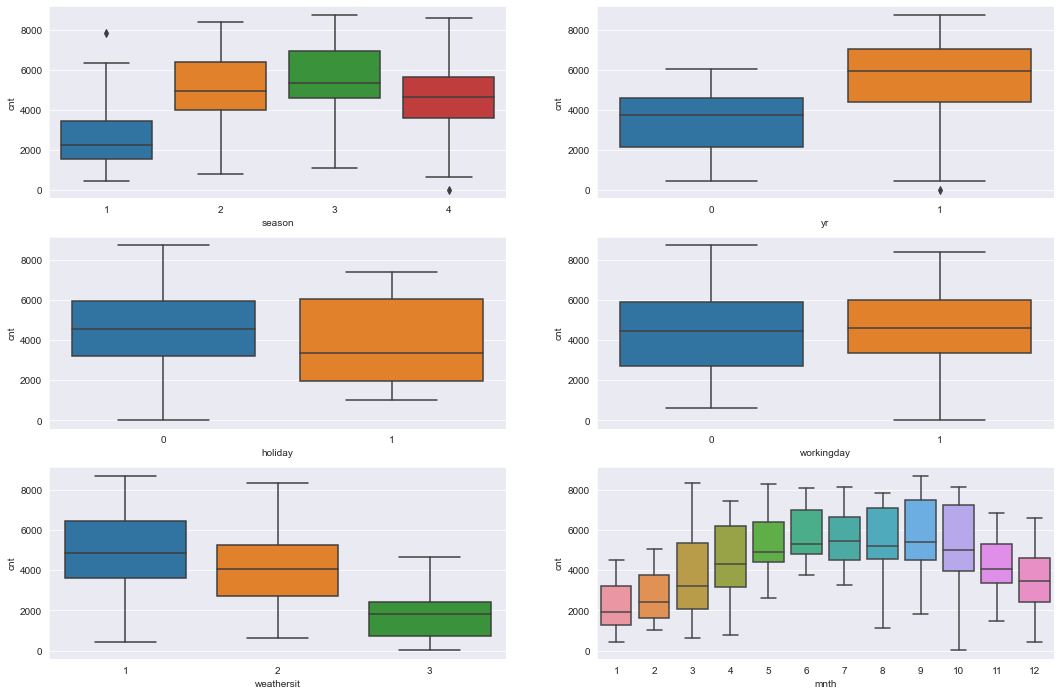

In [358]:
plt.figure(figsize=(18, 12))
plt.subplot(3, 2, 1)
sns.boxplot(x='season', y='cnt', data=bikedata)
plt.subplot(3, 2, 2)
sns.boxplot(x='yr', y='cnt', data=bikedata)
plt.subplot(3, 2, 3)
sns.boxplot(x='holiday', y='cnt', data=bikedata)
plt.subplot(3, 2, 4)
sns.boxplot(x='workingday', y='cnt', data=bikedata)
plt.subplot(3, 2, 5)
sns.boxplot(x='weathersit', y='cnt', data=bikedata)
plt.subplot(3, 2, 6)
sns.boxplot(x='mnth', y='cnt', data=bikedata)
plt.show()

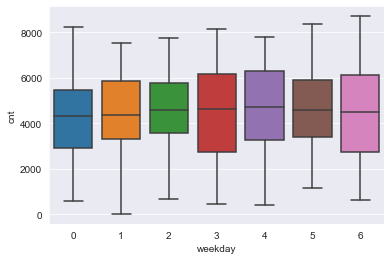

In [359]:
sns.boxplot(x='weekday', y='cnt', data=bikedata)
plt.show()

**Analysis**
 * ride count is high on clear and mist consition
 * ride count is higher for summer and fall seasons
 * For 2019, there is increase in rider count
 * ride count is higher from months April to October which suggests that **summer and fall has more ridership, hence here is visible collinearity between months and seasons, which we will handle later in the notebook**


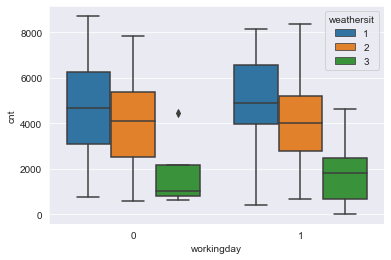

In [360]:

sns.boxplot(x='workingday', y='cnt', hue='weathersit', data=bikedata)
plt.show()

#### Data cleaning - Removing the un-neccessary parameters

* Some of the variables doesn't any value to analysis thus those can be removed
* Month is reduced because of high collinearity with season
* Weekday is removed it doesn't add value to analysis("Workingday" actually represents it),  thus those can be removed.
 * **Weekday** and **mnth** are dropped because that will give rise too many columns which will be almost impossible and impractical to evaluate and interpret.

In [361]:
remove_vars = [
    'casual', 'registered', 'dteday', 'instant', 'weekday', 'mnth'
              ]
bikedata = bikedata.drop(remove_vars, axis=1)
bikedata.head()

season  yr  holiday  workingday  weathersit       temp     atemp      hum  \
0       1   0        0           0           2  14.110847  18.18125  80.5833   
1       1   0        0           0           2  14.902598  17.68695  69.6087   
2       1   0        0           1           1   8.050924   9.47025  43.7273   
3       1   0        0           1           1   8.200000  10.60610  59.0435   
4       1   0        0           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

#### Dealing with categroical variables
 * Season
 * Weather situation


In [362]:
""" This function returns the dummy encoded dataframe

Dataset =  Input dataframe, 
VarName = Column name whose dummy variable need to be made, 
IsDropFirst = Boolean flag to drop first column or not from dummy encoded dataframe
"""

def GetDummyEncoded(Dataset, VarName, IsDropFirst):
    DummyVar = pd.get_dummies(Dataset[VarName], drop_first = IsDropFirst)
    return DummyVar

**Season**

In [363]:
SeasonDict = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

In [364]:
# Change the numerical representation of season to textual format

bikedata.season = bikedata.season.apply(lambda x:SeasonDict[x])
bikedata.head()

season  yr  holiday  workingday  weathersit       temp     atemp      hum  \
0  spring   0        0           0           2  14.110847  18.18125  80.5833   
1  spring   0        0           0           2  14.902598  17.68695  69.6087   
2  spring   0        0           1           1   8.050924   9.47025  43.7273   
3  spring   0        0           1           1   8.200000  10.60610  59.0435   
4  spring   0        0           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

In [365]:
# Concatenates the dummy encoded dataframe with the existing master dataframe

bikedata = pd.concat([bikedata, GetDummyEncoded(bikedata,"season",IsDropFirst = True)], axis = 1)
bikedata.head()

season  yr  holiday  workingday  weathersit       temp     atemp      hum  \
0  spring   0        0           0           2  14.110847  18.18125  80.5833   
1  spring   0        0           0           2  14.902598  17.68695  69.6087   
2  spring   0        0           1           1   8.050924   9.47025  43.7273   
3  spring   0        0           1           1   8.200000  10.60610  59.0435   
4  spring   0        0           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  spring  summer  winter  
0  10.749882   985       1       0       0  
1  16.652113   801       1       0       0  
2  16.636703  1349       1       0       0  
3  10.739832  1562       1       0       0  
4  12.522300  1600       1       0       0

**Weather Situation**

In [366]:
WeatherDict = {1: "clear", 2: "mist", 3: "snow", 4: "rain"}

In [367]:
# Change the numerical representation of weathersit to textual format

bikedata.weathersit = bikedata.weathersit.apply(lambda x:WeatherDict[x])
bikedata.head()

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   

   windspeed   cnt  spring  summer  winter  
0  10.749882   985       1       0       0  
1  16.652113   801       1       0       0  
2  16.636703  1349       1       0       0  
3  10.739832  1562       1       0       0  
4  12.522300  1600       1       0       0

In [368]:
bikedata.weathersit.value_counts()

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

In [369]:
# Concatenates the dummy encoded dataframe with the existing master dataframe
# Since weathers are 4 but in dataset, only 3 types are recorded thus we cannot drop first column

bikedata = pd.concat(
    [bikedata,
     GetDummyEncoded(bikedata, "weathersit", IsDropFirst=False)],
    axis=1)
bikedata.head()

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   

   windspeed   cnt  spring  summer  winter  clear  mist  snow  
0  10.749882   985       1       0       0      0     1     0  
1  16.652113   801       1       0       0      0     1     0  
2  16.636703  1349       1       0       0      1     0     0  
3  10.739832  1562       1       0       0      1     0     0  
4  12.522300  1600       1       0       0      1     0     0

#### Remove the redundant categorical variables after encoding is done

In [370]:
redundant_vars = ['season', 'weathersit']

In [371]:
bikedata = bikedata.drop(redundant_vars, axis=1)
bikedata.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  winter  clear  mist  snow  
0       1       0       0      0     1     0  
1       1       0       0      0     1     0  
2       1       0       0      1     0     0  
3       1       0       0      1     0     0  
4       1       0       0      1     0     0

#### Split the dataset into train and test dataset

* Train dataset = 75% of total dataset

In [372]:
np.random.seed(0) # seeding is set to zero
train, test = train_test_split(bikedata, train_size = 0.75, random_state = 100)
print("Train shape ->",train.shape)
print("Test shape ->",test.shape)

Train shape -> (547, 14)
Test shape -> (183, 14)


#### Scale the train dataset parameters - Normalization

* Scaling is done on numerical variables.
* Scaling is done on the target variable as well beacuse we want to do some statistical interpretation of the data.

In [373]:
scale_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt' ] # numerical variables to be scaled
sc = MinMaxScaler()

train[scale_vars] = sc.fit_transform(train[scale_vars])
train[scale_vars].head()

temp     atemp       hum  windspeed       cnt
311  0.435124  0.437339  0.743667   0.057471  0.481247
523  0.735215  0.680985  0.482181   0.286093  0.887483
381  0.391151  0.374375  0.737917   0.659615  0.335136
413  0.358285  0.362754  0.550880   0.319514  0.494248
253  0.740406  0.695906  0.735509   0.156398  0.578003

#### Crosscheking of the scaled parmeters

* Since normalization have been used so all the parameters have been scaled to 0-1

In [374]:
train[scale_vars].describe()

temp       atemp         hum   windspeed         cnt
count  547.000000  547.000000  547.000000  547.000000  547.000000
mean     0.535543    0.511400    0.650673    0.319317    0.511382
std      0.225446    0.211788    0.144515    0.169239    0.225008
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.336998    0.326287    0.538858    0.197844    0.350437
50%      0.535847    0.521862    0.655216    0.294101    0.514266
75%      0.735215    0.688457    0.753113    0.413761    0.682697
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [375]:
train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
311   0        0           1  0.435124  0.437339  0.743667   0.057471   
523   1        0           1  0.735215  0.680985  0.482181   0.286093   
381   1        0           1  0.391151  0.374375  0.737917   0.659615   
413   1        0           0  0.358285  0.362754  0.550880   0.319514   
253   0        0           0  0.740406  0.695906  0.735509   0.156398   

          cnt  spring  summer  winter  clear  mist  snow  
311  0.481247       0       0       1      1     0     0  
523  0.887483       0       1       0      1     0     0  
381  0.335136       1       0       0      0     1     0  
413  0.494248       1       0       0      1     0     0  
253  0.578003       0       0       0      1     0     0

#### Understand correlation among the parameters of train dataset(scaled only)

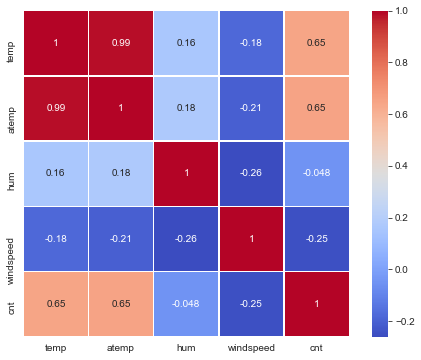

In [376]:
plt.figure(figsize=[8, 6])
sns.heatmap(train[scale_vars].corr(),
            square=True,
            linewidths=.5,
            cmap='coolwarm',
            annot=True,
            annot_kws={'size': 10})
plt.show()

**Analysis**:

* High correlation of temp, atemp and season with target variable.

* The +ve correlation of yr with cnt gives us an idea that there is a growth of ride from the past years.

#### Plot the highest correlation variable with target variable

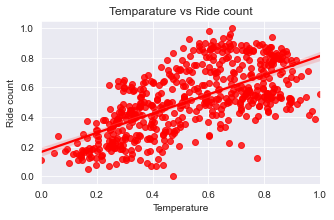

In [377]:
plt.figure(figsize = [5,3])
sns.regplot(train.temp, train.cnt, color = 'r')
plt.xlabel("Temperature")
plt.ylabel("Ride count")
plt.title("Temparature vs Ride count")
plt.show()

**Analysis**:
* A positive trend is observed along with the regression line

#### Split the train set to input and output sub-dataset

* y_train = Target variable for training
* X_train = Input variables for training

In [378]:
y_train = train.pop('cnt') 
X_train = train

In [379]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
311   0        0           1  0.435124  0.437339  0.743667   0.057471       0   
523   1        0           1  0.735215  0.680985  0.482181   0.286093       0   
381   1        0           1  0.391151  0.374375  0.737917   0.659615       1   
413   1        0           0  0.358285  0.362754  0.550880   0.319514       1   
253   0        0           0  0.740406  0.695906  0.735509   0.156398       0   

     summer  winter  clear  mist  snow  
311       0       1      1     0     0  
523       1       0      1     0     0  
381       0       0      0     1     0  
413       0       0      1     0     0  
253       0       0      1     0     0

In [380]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'clear', 'mist', 'snow'],
      dtype='object')

In [381]:
"""
This functions returns the statistical information of regression for the parameters its setted with

XDataset = Input dataset
YDataset = Target variables
VarList = Parameters in Input dataset that need to be fitted
"""

def GetRegressionInfo(XDataset,YDataset, VarList):

    # Create dummy constants for the dataset provided with the specified variable names
    X_train_Const = sm.add_constant(XDataset[VarList]) 

    # Create a  fitted model
    smlr = sm.OLS(YDataset, X_train_Const).fit()
    return smlr

In [382]:
"""
This functions returns the dataframe that will contain the names of all the feature 
variables and their respective VIFs

XDataset = Input dataset
"""
def GetVIF(XDataset):
    vif = pd.DataFrame()

    # Create dataframe for storing the predictor names and their respective VIF values
    vif['Features'] = XDataset.columns
    vif['VIF'] = [variance_inflation_factor(XDataset.values, i)for i in range(XDataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [383]:
X_train.columns.shape[0]

13

**We will go with bit conservative approach by setting the number of RFE variables just one less than number of predictor variables count**

In [384]:
# Running RFE with the output number of the variable equal to X_train column count - 1
RFEVariableCount = (X_train.columns.shape[0] - 1)
lr_rfe = LinearRegression()
lr_rfe.fit(X_train, X_train)

rfe = RFE(lr_rfe, RFEVariableCount)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [385]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('mist', True, 1),
 ('snow', True, 1)]

In [386]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'clear', 'mist', 'snow'],
      dtype='object')

In [387]:
X_train.columns[~rfe.support_]

Index(['workingday'], dtype='object')

In [388]:
X_train = X_train[col]

** Now let's use this to further drop or continue the predictor variables**

In [389]:
GetRegressionInfo(X_train, y_train,X_train.columns ).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     236.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.92e-197
Time:                        13:55:19   Log-Likelihood:                 523.80
No. Observations:                 547   AIC:                            -1024.
Df Residuals:                     535   BIC:                            -972.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.337e+10   7.35e+11      0.073      0.942   -1.39e+12     1.5e+12
yr             0.2297      0.008     28.140      0.000       0.214       0.246
holiday       -0.1049      0.025     -4.228      0.000      -0.154      -0.056
temp           0.4849      0.138      3.509      0.000       0.213       0.756
atemp          0.0202      0.142      0.142      0.887      -0.259       0.299
hum           -0.1421      0.038     -3.725      0.000      -0.217      -0.067
windspeed     -0.1749      0.026     -6.656      0.000      -0.227      -0.123
spring        -0.0777      0.020     -3.906      0.000      -0.117      -0.039
summer         0.0428      0.014      3.167      0.002       0.016       0.069
winter         0.0931      0.016      5.665      0.000       0.061       0.125
clear      -5.337e+10   7.35e+11     -0.073      0.942    -1.5e+12    1.39e+12
mist       -5.337e+10   7.35e+11     -0.073      0.942    -1.5e+12    1.39e+12
snow       -5.337e+10   7.35e+11     -0.073      0.942    -1.5e+12    1.39e+12
==============================================================================
Omnibus:                       71.112   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.557
Skew:                          -0.676   Prob(JB):                     7.56e-39
Kurtosis:                       5.423   Cond. No.                     6.42e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis**
* Variable to look out for are:
    * atemp(already have high correlation with temp)
    * hum
    * clear
    * summer
* We will delete one by one and again fit the model and get the VIF information to proceed

** Removing atemp**(already have high correlation with temp)

In [390]:
X_train = X_train.drop('atemp', axis= 1)

In [391]:
GetRegressionInfo(X_train, y_train, X_train.columns).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     262.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.74e-199
Time:                        13:55:19   Log-Likelihood:                 525.71
No. Observations:                 547   AIC:                            -1029.
Df Residuals:                     536   BIC:                            -982.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.752e+10   7.31e+11      0.092      0.926   -1.37e+12     1.5e+12
yr             0.2297      0.008     28.272      0.000       0.214       0.246
holiday       -0.1050      0.025     -4.258      0.000      -0.153      -0.057
temp           0.5041      0.033     15.320      0.000       0.439       0.569
hum           -0.1423      0.038     -3.733      0.000      -0.217      -0.067
windspeed     -0.1757      0.026     -6.839      0.000      -0.226      -0.125
spring        -0.0773      0.020     -3.926      0.000      -0.116      -0.039
summer         0.0432      0.013      3.263      0.001       0.017       0.069
winter         0.0936      0.016      5.812      0.000       0.062       0.125
clear      -6.752e+10   7.31e+11     -0.092      0.926    -1.5e+12    1.37e+12
mist       -6.752e+10   7.31e+11     -0.092      0.926    -1.5e+12    1.37e+12
snow       -6.752e+10   7.31e+11     -0.092      0.926    -1.5e+12    1.37e+12
==============================================================================
Omnibus:                       70.489   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.696
Skew:                          -0.669   Prob(JB):                     1.16e-38
Kurtosis:                       5.423   Cond. No.                     6.13e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [392]:
GetVIF(X_train)

Features    VIF
8       clear  46.19
9        mist  31.98
5      spring   4.63
10       snow   3.88
2        temp   3.43
7      winter   3.00
6      summer   2.02
3         hum   1.87
4   windspeed   1.18
0          yr   1.03
1     holiday   1.01

**Analysis**
* Seems like we have to drop clear and crosscheck

** Removing clear**

In [393]:
X_train = X_train.drop('clear', axis= 1)

In [394]:
GetRegressionInfo(X_train, y_train, X_train.columns).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     262.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.73e-199
Time:                        13:55:19   Log-Likelihood:                 525.71
No. Observations:                 547   AIC:                            -1029.
Df Residuals:                     536   BIC:                            -982.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2872      0.034      8.346      0.000       0.220       0.355
yr             0.2297      0.008     28.282      0.000       0.214       0.246
holiday       -0.1050      0.025     -4.257      0.000      -0.153      -0.057
temp           0.5040      0.033     15.336      0.000       0.439       0.569
hum           -0.1419      0.038     -3.748      0.000      -0.216      -0.068
windspeed     -0.1757      0.026     -6.846      0.000      -0.226      -0.125
spring        -0.0773      0.020     -3.931      0.000      -0.116      -0.039
summer         0.0431      0.013      3.262      0.001       0.017       0.069
winter         0.0936      0.016      5.812      0.000       0.062       0.125
mist          -0.0515      0.010     -4.904      0.000      -0.072      -0.031
snow          -0.2420      0.027     -8.919      0.000      -0.295      -0.189
==============================================================================
Omnibus:                       70.627   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.278
Skew:                          -0.670   Prob(JB):                     8.69e-39
Kurtosis:                       5.428   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
GetVIF(X_train)

Features    VIF
3        hum  26.79
2       temp  14.54
4  windspeed   4.55
5     spring   3.82
7     winter   2.95
8       mist   2.28
6     summer   2.19
0         yr   2.07
9       snow   1.22
1    holiday   1.04

**Analysis**
* Seems like we have to drop hum and crosscheck

** Removing hum**

In [396]:
X_train = X_train.drop('hum', axis= 1)

In [397]:
GetRegressionInfo(X_train, y_train, X_train.columns).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     283.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.58e-197
Time:                        13:55:19   Log-Likelihood:                 518.64
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -974.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.029      7.472      0.000       0.157       0.269
yr             0.2333      0.008     28.588      0.000       0.217       0.249
holiday       -0.1057      0.025     -4.237      0.000      -0.155      -0.057
temp           0.4764      0.032     14.697      0.000       0.413       0.540
windspeed     -0.1480      0.025     -5.948      0.000      -0.197      -0.099
spring        -0.0838      0.020     -4.224      0.000      -0.123      -0.045
summer         0.0394      0.013      2.956      0.003       0.013       0.066
winter         0.0824      0.016      5.144      0.000       0.051       0.114
mist          -0.0745      0.009     -8.653      0.000      -0.091      -0.058
snow          -0.2812      0.025    -11.096      0.000      -0.331      -0.231
==============================================================================
Omnibus:                       68.836   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.183
Skew:                          -0.659   Prob(JB):                     3.02e-37
Kurtosis:                       5.375   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
GetVIF(X_train)

Features   VIF
3  windspeed  4.52
2       temp  3.57
0         yr  2.06
4     spring  1.98
5     summer  1.79
6     winter  1.61
7       mist  1.55
8       snow  1.07
1    holiday  1.04

**Analysis**
* The equation becomes as this : y = 0.2133 + 0.2333 X yr + (-0.1057) X holiday+0.4764 X temp+(-0.1480) X windspeed+(-0.0838) X spring+0.0394 X summer+0.0824 X winter+(-0.0745) X mist+(-0.2812) X snow
* Seems after deleting variables we both P-value ~0.0 and VIF < 5.0 thus we can go 
ahead with the present features and  train our model.

In [399]:
X_train.head()

yr  holiday      temp  windspeed  spring  summer  winter  mist  snow
311   0        0  0.435124   0.057471       0       0       1     0     0
523   1        0  0.735215   0.286093       0       1       0     0     0
381   1        0  0.391151   0.659615       1       0       0     1     0
413   1        0  0.358285   0.319514       1       0       0     0     0
253   0        0  0.740406   0.156398       0       0       0     0     0

#### Training with selected features

In [400]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Table to understand relative importances of all predictor variables**

In [401]:
pd.DataFrame(np.append(X_train.columns.values.reshape(-1,1),lr.coef_.reshape(-1,1)*100, axis = 1), columns= ['Predictor variables', 'Importances(%)']).sort_values(by = 'Importances(%)', ascending = False)

Predictor variables Importances(%)
2                temp        47.6409
0                  yr        23.3285
6              winter        8.23556
5              summer        3.94489
7                mist       -7.45182
4              spring       -8.37807
1             holiday       -10.5727
3           windspeed       -14.7967
8                snow       -28.1218

#### Predict using the X train so as to do residual analysis

In [402]:
y_train_pred = lr.predict(X_train)

Text(0.5, 0, 'Errors')

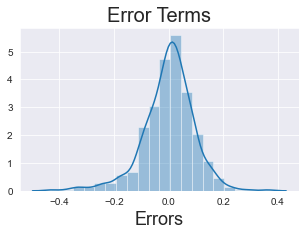

In [403]:
plt.figure(figsize = [5,3])
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

**Analysis**
* The peak is centered around 0 and almost like a normal distribution
* Thus the error is normally distributed

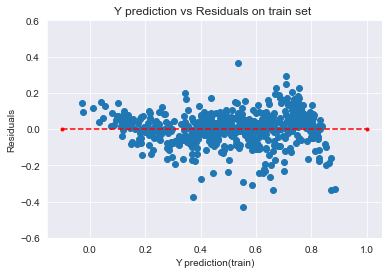

In [404]:
plt.scatter( y_train_pred, (y_train - y_train_pred))
plt.plot([-0.1,1],[0,0], color = 'r', marker='.', linestyle='dashed')
plt.ylim([-0.6,0.6])
plt.xlabel('Y prediction(train)')
plt.ylabel('Residuals')
plt.title('Y prediction vs Residuals on train set ')
plt.show()

** Analysis**

* The error terms just appear to be evenly distributed noise around zero which is ideal.
* Variance is constant.

#### Transforming the test set to same scale of train set

In [405]:
test[scale_vars] = sc.transform(test[scale_vars])
test[scale_vars].head()

temp     atemp       hum  windspeed       cnt
184  0.831783  0.769660  0.657364   0.084219  0.692706
535  0.901354  0.842587  0.610133   0.153728  0.712034
299  0.511964  0.496145  0.837699   0.334206  0.303382
221  0.881625  0.795343  0.437098   0.339570  0.547400
152  0.817246  0.741471  0.314298   0.537414  0.569029

#### Split the test set to input and output sub-dataset

* y_test = Target variable for testing
* X_test = input variables for testing

In [406]:
X_test = test[X_train.columns]
y_test = test.pop('cnt') 

In [407]:
X_test.head()

yr  holiday      temp  windspeed  spring  summer  winter  mist  snow
184   0        1  0.831783   0.084219       0       0       0     1     0
535   1        0  0.901354   0.153728       0       1       0     0     0
299   0        0  0.511964   0.334206       0       0       1     1     0
221   0        0  0.881625   0.339570       0       0       0     0     0
152   0        0  0.817246   0.537414       0       1       0     0     0

#### Making predictions with test set

In [408]:
y_pred = lr.predict(X_test)

In [409]:
y_pred[:5].reshape(-1,1)

array([[0.41688084],
       [0.8927198 ],
       [0.41560903],
       [0.58308797],
       [0.56259148]])

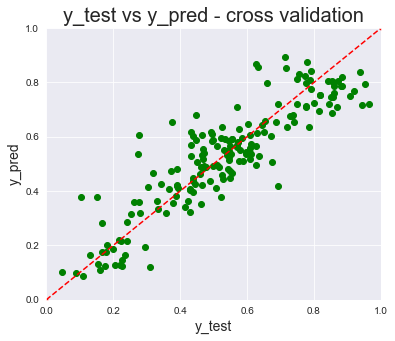

In [410]:
plt.figure(figsize = [6,5])
plt.scatter(y_test,y_pred, color = 'g')
plt.plot([0,1], [0,1], color = 'r', marker='.', linestyle='dashed')
plt.title('y_test vs y_pred - cross validation', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

**Analysis**
* As we can se the spread  of **y_pred and y_test**
* Since the plot  is along the 45 degree line which suggest that the model is well fitted and have good prediction capability

In [411]:
y = np.append(y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1), axis=1)
y[:10]

array([[0.69270594, 0.41688084],
       [0.71203405, 0.8927198 ],
       [0.30338242, 0.41560903],
       [0.54739991, 0.58308797],
       [0.56902899, 0.56259148],
       [0.438104  , 0.43676772],
       [0.51035435, 0.56627022],
       [0.55372757, 0.46691529],
       [0.69270594, 0.71912871],
       [0.49585826, 0.61157385]])

In [412]:
y_df =pd.DataFrame(y, columns=['y_test', 'y_pred'])
y_df.head()

y_test    y_pred
0  0.692706  0.416881
1  0.712034  0.892720
2  0.303382  0.415609
3  0.547400  0.583088
4  0.569029  0.562591

**Bin the y_test and y_pred into discrete bins and then estimate the central tendency and a confidence interval**
    
    For interpretation purpose only 30 data bins are shown

<Figure size 432x360 with 0 Axes>

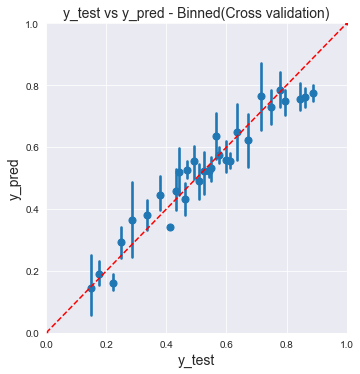

In [413]:
plt.figure(figsize = [6,5])
sns.lmplot( x = 'y_test', y = 'y_pred',  
            data = y_df, 
            fit_reg = False, 
            x_bins = 30 )
plt.plot([0,1], [0,1], color = 'r', marker='.', linestyle='dashed')
plt.title('y_test vs y_pred - Binned(Cross validation)', fontsize=14) 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14) 
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

In [414]:
print("R2 score of the model is {}%".format(
    round(r2_score(y_test, y_pred) * 100, 2)))

R2 score of the model is 78.29%
